次のうちどちらか選択してsweep作成

・2.5秒間24000Hzまでsweepした後に10Hzまでsweepするファイルを作成するコード

In [ ]:
import numpy as np
from scipy.io import wavfile

# パラメータの設定
duration = 5.0  # サウンドの長さ（秒）
sample_rate = 48000  # サンプリングレート
frequency_start = 10  # 開始周波数（Hz）
frequency_end = 24000  # 終了周波数（Hz）

# 時間の配列を生成
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# 開始から終了までの周波数の線形なスウィープを生成
frequency_sweep = np.linspace(frequency_start, frequency_end, len(t))

# サイン波を生成
sweep_sound = np.sin(2 * np.pi * frequency_sweep * t)

# サウンドを正規化
sweep_sound /= np.max(np.abs(sweep_sound))

# WAVファイルとして保存
wavfile.write("sweep_sound.wav", sample_rate, sweep_sound.astype(np.float32))


・5秒間24000Hzまでsweepした後に10Hzまでsweepするがその後に分割して5秒間24000Hzまでsweepするだけのファイルを作成するコード

In [ ]:
import numpy as np
from scipy.io import wavfile

# パラメータの設定
duration = 10.0  # サウンドの長さ（秒）
sample_rate = 48000  # サンプリングレート
frequency_start = 10  # 開始周波数（Hz）
frequency_end = 24000  # 終了周波数（Hz）

# 時間の配列を生成
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# 開始から終了までの周波数の線形なスウィープを生成
frequency_sweep = np.linspace(frequency_start, frequency_end, len(t))

# サイン波を生成
sweep_sound = np.sin(2 * np.pi * frequency_sweep * t)

# サウンドを正規化
sweep_sound /= np.max(np.abs(sweep_sound))

# データを2分割
split_index = len(sweep_sound) // 2
sweep_sound_part1 = sweep_sound[:split_index]
sweep_sound_part2 = sweep_sound[split_index:]

# WAVファイルとして保存
wavfile.write("sweep_sound_part1.wav", sample_rate, sweep_sound_part1.astype(np.float32))
wavfile.write("sweep_sound_part2.wav", sample_rate, sweep_sound_part2.astype(np.float32))


In [ ]:
import numpy as np
from scipy.io.wavfile import write

def generate_silence_wav(output_file, duration_sec=0.5, sample_rate=48000):
    # サンプルデータ生成
    num_samples = int(duration_sec * sample_rate)
    audio_data = np.zeros(num_samples, dtype=np.float32)

    # WAVファイル作成
    write(output_file, sample_rate, audio_data)

# 0.5秒間の無音WAVファイルを生成
generate_silence_wav("silence.wav", duration_sec=0.5)


In [ ]:
import numpy as np
from scipy.io.wavfile import read, write

# 虚空の音声を生成
empty_duration = 0.5  # 虚空の音声の長さ（秒）
empty_sample_rate = 48000  # サンプリングレート
empty_samples = np.zeros(int(empty_duration * empty_sample_rate), dtype=np.int16)

# sweep_sound_part1.wav ファイル読み込み
sample_rate, audio_data = read("sweep_sound_part1.wav")

# 前後に虚空の音声を追加
extended_audio = np.concatenate((empty_samples, audio_data, empty_samples))

# 新しいWAVファイルとして保存
write("extended_sweep_sound.wav", empty_sample_rate, extended_audio)


In [ ]:
import numpy as np
from scipy.io.wavfile import read

# WAVファイル読み込み
sample_rate, audio_data = read("extended_sweep_sound.wav")

# [Float]に変換
float_array = audio_data.astype(np.float32) / 32767.0  # 正規化

# 要素数表示
print("要素数:", len(float_array))


要素数: 288000


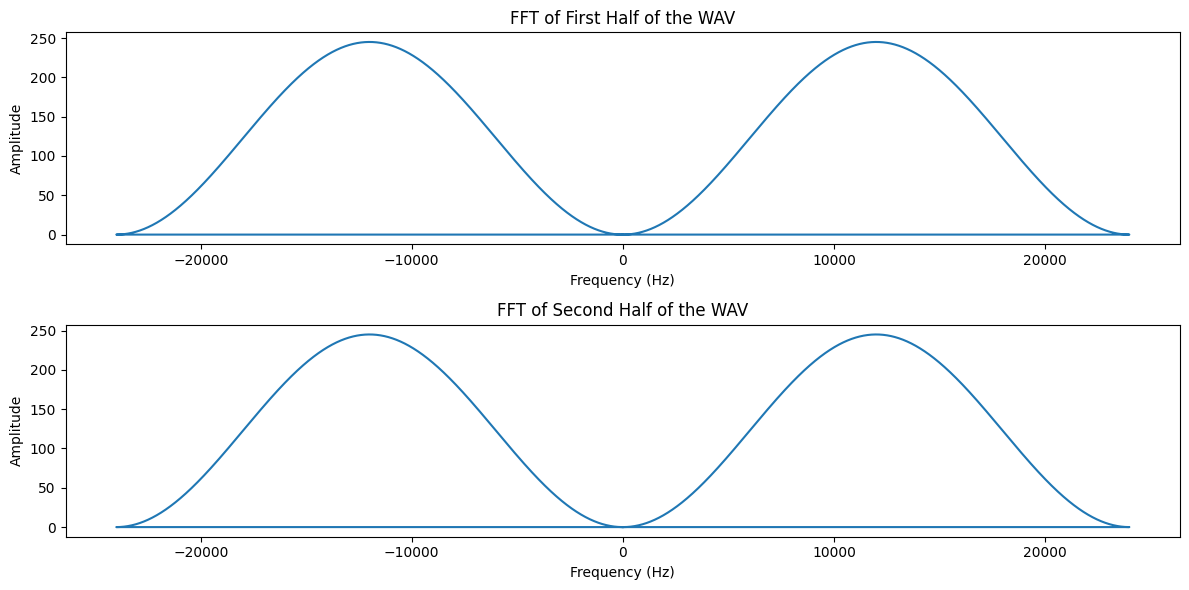

In [ ]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# WAVファイルを読み込む
sample_rate, wave_data = wavfile.read("sweep_sound.wav")

# WAVデータの長さ
n = len(wave_data)

# 窓関数のサイズ（WAVファイルの長さの1/2）
window_size = n // 2

# 窓関数を適用
window1 = np.hanning(window_size)
window2 = np.hanning(window_size)

# 窓関数を適用したデータを取得
signal1 = wave_data[:window_size] * window1
signal2 = wave_data[window_size:2 * window_size] * window2

# FFTを実行
spectrum1 = np.fft.fft(signal1)
spectrum2 = np.fft.fft(signal2)

# 振幅スペクトルを計算
amplitude_spectrum1 = np.abs(spectrum1)
amplitude_spectrum2 = np.abs(spectrum2)

# 周波数軸を設定
freq_axis = np.fft.fftfreq(window_size, 1.0 / sample_rate)

# グラフ化
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title("FFT of First Half of the WAV")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.plot(freq_axis, amplitude_spectrum1)

plt.subplot(2, 1, 2)
plt.title("FFT of Second Half of the WAV")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.plot(freq_axis, amplitude_spectrum2)

plt.tight_layout()
plt.show()


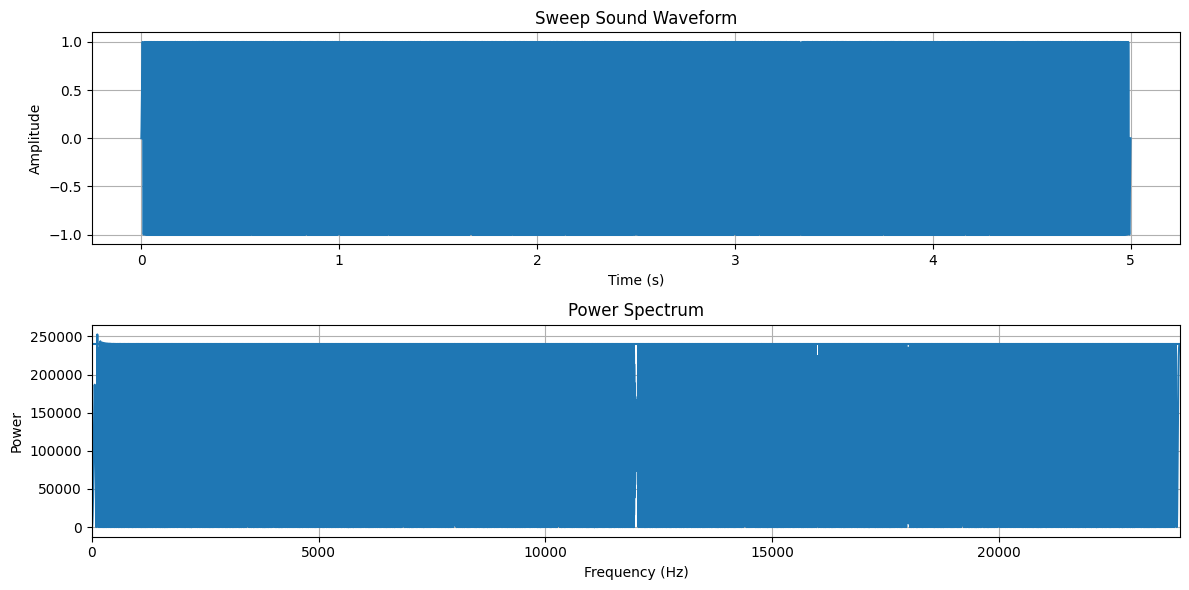

In [ ]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# WAVファイルを読み込む
sample_rate, wave_data = wavfile.read("sweep_sound.wav")

# FFTを実行
fft_result = np.fft.fft(wave_data)
freqs = np.fft.fftfreq(len(fft_result), 1.0 / sample_rate)

# パワースペクトル（振幅スペクトル）を計算
power_spectrum = np.abs(fft_result) ** 2

# 波形とパワースペクトルを表示
plt.figure(figsize=(12, 6))

# 波形を表示
plt.subplot(2, 1, 1)
plt.title("Sweep Sound Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(np.arange(len(wave_data)) / sample_rate, wave_data)
plt.grid(True)

# パワースペクトルを表示
plt.subplot(2, 1, 2)
plt.title("Power Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.plot(freqs, power_spectrum)
plt.grid(True)
plt.xlim(0, sample_rate / 2)  # 正の周波数の範囲のみ表示
plt.tight_layout()

plt.show()


In [ ]:
sudo apt install portaudio19-devは使いたくありません

SyntaxError: ignored

<ipython-input-14-061868c38be5>:14: RuntimeWarning: invalid value encountered in divide
  audio = x * (2 ** 15 - 1) / np.max(x)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25391 (\N{CJK UNIFIED IDEOGRAPH-632F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


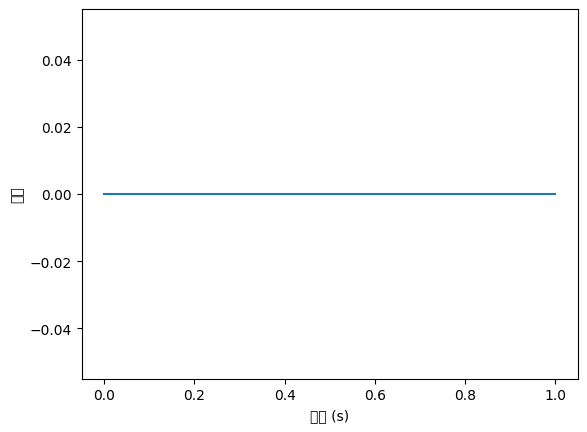

In [ ]:
# 波形の生成
def generate_waveform(f, t, a):
  x = np.sin(2 * np.pi * f * t)
  y = np.where(x >= a, x, 0)
  return y

# エンベロープの生成
def generate_envelope(x, t):
  y = np.max(x, axis=0)
  return y

# 音声の生成
def generate_audio(x, fs):
  audio = x * (2 ** 15 - 1) / np.max(x)
  audio = audio.astype("int16")
  return audio

# グラフの作成
def plot_waveform(x, t):
  plt.plot(t, x)
  plt.xlabel("時間 (s)")
  plt.ylabel("振幅")
  plt.show()

# メイン
fs = 1000  # サンプリング周波数
f = 1000  # 周波数
t = np.arange(0, 1, 1 / fs)  # 時間
a = 0.5  # 振幅

# 波形の生成
y = generate_waveform(f, t, a)

# エンベロープの生成
envelope = generate_envelope(y, t)

# 音声の生成
audio = generate_audio(y, fs)

# 音声を保存
with wave.open("output.wav", "wb") as wf:
  wf.setnchannels(1)
  wf.setsampwidth(2)
  wf.setframerate(fs)
  wf.writeframes(audio)

# グラフの作成
plot_waveform(y, t)


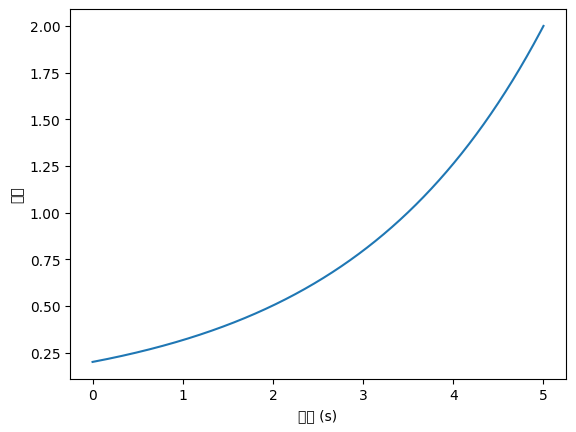

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import wave

# 波形の生成
def generate_waveform(f, t, a):
  x = np.sin(2 * np.pi * f * t)
  y = np.where(x >= a, x, 0)
  return y

# エンベロープの生成
def generate_envelope(x, t, f_start, f_end):
  y = np.max(x, axis=0)
  y = y * (f_end / f_start) ** (t / t.max()) / t.max()
  return y

# 音声の生成
def generate_audio(x, fs):
  audio = x * (2 ** 15 - 1) / np.max(x)
  audio = audio.astype("int16")
  return audio

# グラフの作成
def plot_waveform(x, t):
  plt.plot(t, x)
  plt.xlabel("時間 (s)")
  plt.ylabel("振幅")
  plt.show()

# メイン
fs = 44100  # サンプリング周波数
t = np.arange(0, 5, 1 / fs)  # 時間
f_start = 100  # 開始周波数
f_end = 1000  # 終了周波数
a = 0.5  # 振幅

# 波形の生成
y = generate_envelope(generate_waveform(f_start, t, a), t, f_start, f_end)

# 音声の生成
audio = generate_audio(y, fs)

# 音声を保存
with wave.open("output.wav", "wb") as wf:
  wf.setnchannels(1)
  wf.setsampwidth(2)
  wf.setframerate(fs)
  wf.writeframes(audio)

# グラフの作成
plot_waveform(y, t)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25391 (\N{CJK UNIFIED IDEOGRAPH-632F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


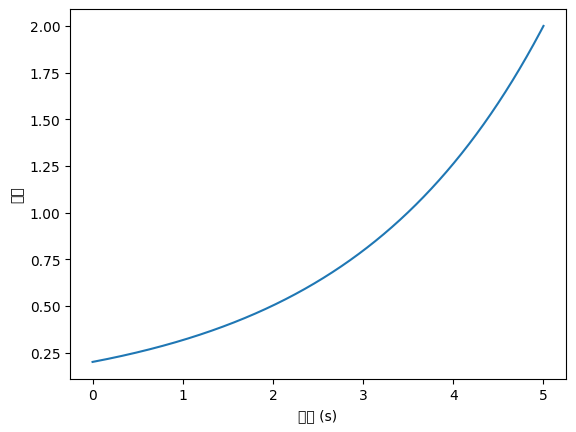

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27874 (\N{CJK UNIFIED IDEOGRAPH-6CE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


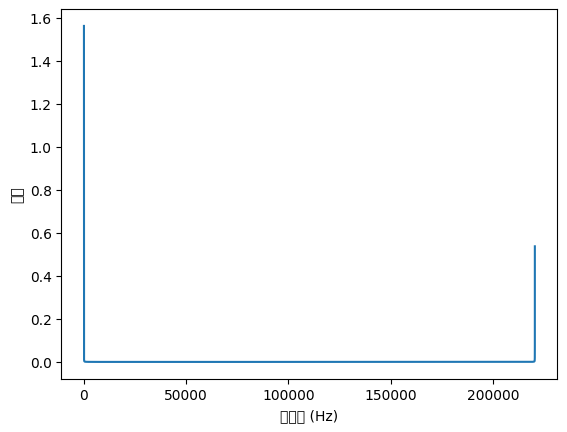

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import wave

# 波形の生成
def generate_waveform(f, t, a):
  x = np.sin(2 * np.pi * f * t)
  y = np.where(x >= a, x, 0)
  return y

# エンベロープの生成
def generate_envelope(x, t, f_start, f_end):
  y = np.max(x, axis=0)
  y = y * (f_end / f_start) ** (t / t.max()) / t.max()
  return y

# 音声の生成
def generate_audio(x, fs):
  audio = x * (2 ** 15 - 1) / np.max(x)
  audio = audio.astype("int16")
  return audio

# グラフの作成
def plot_waveform(x, t):
  plt.plot(t, x)
  plt.xlabel("時間 (s)")
  plt.ylabel("振幅")
  plt.show()

# FFT の計算
def fft(x):
  n = len(x)
  y = np.fft.fft(x)
  y = 2 * np.abs(y / n)
  return y

# メイン
fs = 44100  # サンプリング周波数
t = np.arange(0, 5, 1 / fs)  # 時間
f_start = 100  # 開始周波数
f_end = 1000  # 終了周波数
a = 0.5  # 振幅

# 波形の生成
y = generate_envelope(generate_waveform(f_start, t, a), t, f_start, f_end)

# 音声の生成
audio = generate_audio(y, fs)

# グラフの作成
plot_waveform(y, t)

# FFT の計算
fft_y = fft(y)

# グラフの作成
plt.plot(fft_y)
plt.xlabel("周波数 (Hz)")
plt.ylabel("振幅")
plt.show()


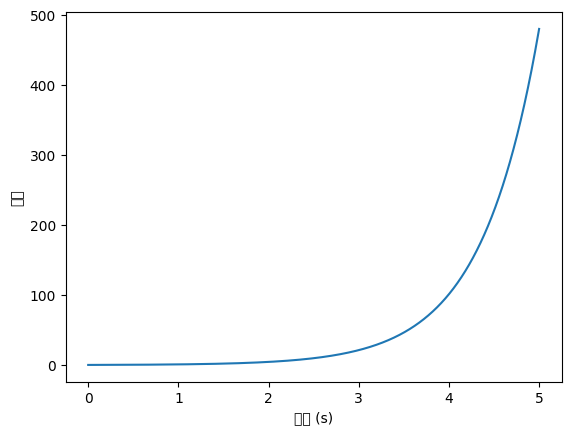

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import wave

# 波形の生成
def generate_sin_sweep(f_start, f_end, t, a):
  x = np.sin(2 * np.pi * (f_start + (f_end - f_start) * t / t.max()))
  y = np.where(x >= a, x, 0)
  return y

# エンベロープの生成
def generate_envelope(x, t, f_start, f_end):
  y = np.max(x, axis=0)
  y = y * (f_end / f_start) ** (t / t.max()) / t.max()
  return y

# 音声の生成
def generate_audio(x, fs):
  audio = x * (2 ** 15 - 1) / np.max(x)
  audio = audio.astype("int16")
  return audio

# グラフの作成
def plot_waveform(x, t):
  plt.plot(t, x)
  plt.xlabel("時間 (s)")
  plt.ylabel("振幅")
  plt.show()

# メイン
duration = 5.0  # サウンドの長さ（秒）
sample_rate = 48000  # サンプリングレート
frequency_start = 10  # 開始周波数（Hz）
frequency_end = 24000  # 終了周波数（Hz）
a = 0.5  # 振幅

# 波形の生成
t = np.arange(0, duration, 1 / sample_rate)
y = generate_sin_sweep(frequency_start, frequency_end, t, a)

# エンベロープの生成
envelope = generate_envelope(y, t, frequency_start, frequency_end)

# 音声の生成
audio = generate_audio(envelope, sample_rate)

# 音声を保存
with wave.open("output.wav", "wb") as wf:
  wf.setnchannels(1)
  wf.setsampwidth(2)
  wf.setframerate(sample_rate)
  wf.writeframes(audio)

# グラフの作成
plot_waveform(envelope, t)


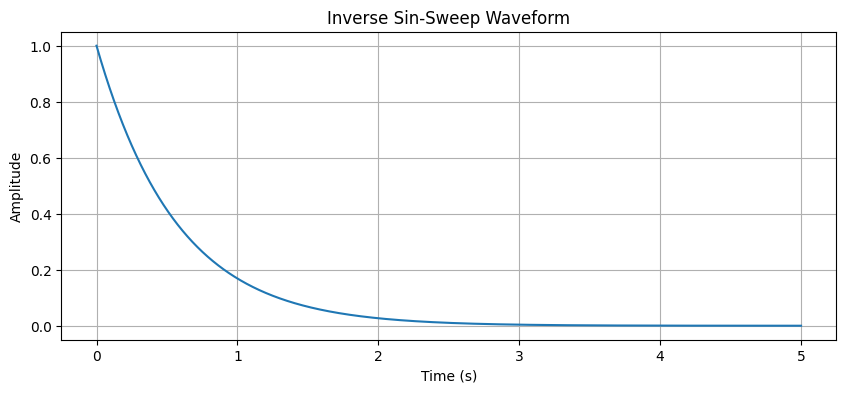

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# サウンドの設定
duration = 5.0  # サウンドの長さ（秒）
sample_rate = 48000  # サンプリングレート
frequency_start = 10  # 開始周波数（Hz）
frequency_end = 24000  # 終了周波数（Hz）

# 時間軸を生成
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# 逆sin-sweepの波形を生成
y = np.zeros_like(t)
for i, time in enumerate(t):
    y[i] = (1.0 - time / duration) * (frequency_start / frequency_end) ** (time / duration)

# サウンドを正規化
y /= np.max(np.abs(y))

# 波形をプロット
plt.figure(figsize=(10, 4))
plt.plot(t, y)
plt.title('Inverse Sin-Sweep Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


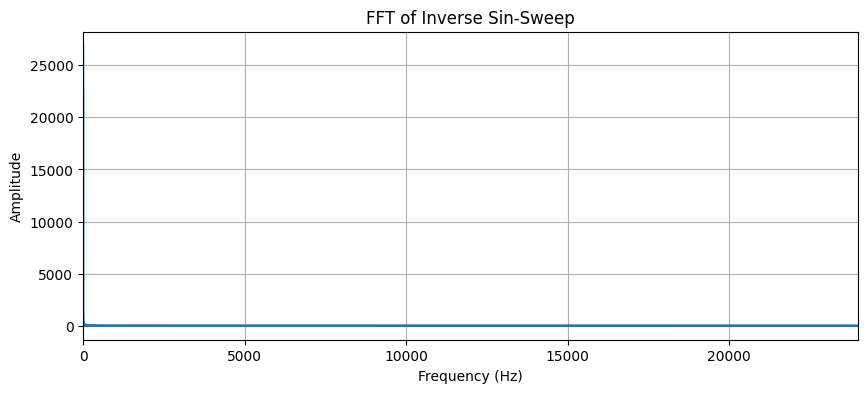

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# サウンドの設定
duration = 5.0  # サウンドの長さ（秒）
sample_rate = 48000  # サンプリングレート
frequency_start = 10  # 開始周波数（Hz）
frequency_end = 24000  # 終了周波数（Hz）

# 時間軸を生成
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# 逆sin-sweepの波形を生成
y = np.zeros_like(t)
for i, time in enumerate(t):
    y[i] = (1.0 - time / duration) * (frequency_start / frequency_end) ** (time / duration)

# サウンドを正規化
y /= np.max(np.abs(y))

# FFTを実行
fft_result = np.fft.fft(y)
fft_freqs = np.fft.fftfreq(len(fft_result), 1 / sample_rate)

# 波形のFFT結果をプロット
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs, np.abs(fft_result))
plt.title('FFT of Inverse Sin-Sweep')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim(0, sample_rate / 2)  # 正の周波数の範囲に制限
plt.show()


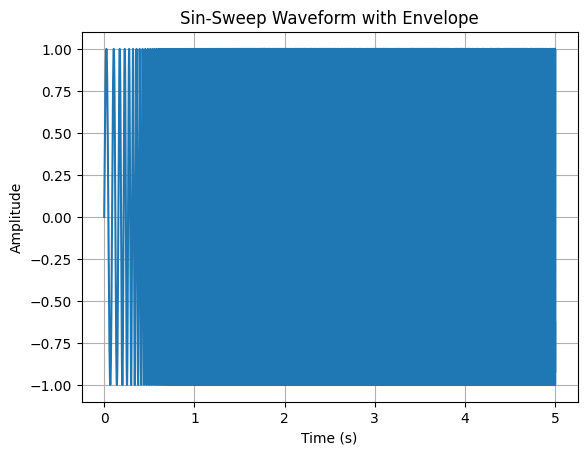

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# パラメータ設定
duration = 5.0  # サウンドの長さ（秒）
sample_rate = 48000  # サンプリングレート
frequency_start = 10  # 開始周波数（Hz）
frequency_end = 24000  # 終了周波数（Hz）

# 時間軸を生成
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# エンベロープを計算
T = duration
envelope = (frequency_end / frequency_start) ** (t / T)

# sin-sweep波形を生成
sine_wave = np.sin(2 * np.pi * frequency_start * t * envelope)

# 波形を正規化
sine_wave /= np.max(np.abs(sine_wave))

# グラフを描画
plt.plot(t, sine_wave)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sin-Sweep Waveform with Envelope')
plt.grid(True)

# グラフを表示
plt.show()

# wavファイルに保存
wavfile.write("sin_sweep_with_envelope.wav", sample_rate, (sine_wave * 32767).astype(np.int16))


In [ ]:
import numpy as np
from scipy.signal import chirp
from scipy.io import wavfile

# パラメータ設定
duration = 5.0  # サウンドの長さ（秒）
sample_rate = 48000  # サンプリングレート
frequency_start = 10  # 開始周波数（Hz）
frequency_end = 24000  # 終了周波数（Hz）

# 時間ベクトルを生成
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# エンベロープを計算
T = duration
envelope = (
    t * (frequency_end / frequency_start) ** (t / T) / T
)  # エンベロープ式

# 波形を生成
waveform = chirp(t, f0=frequency_start, f1=frequency_end, t1=duration, method="quadratic")
waveform *= envelope  # エンベロープを適用

# 波形を正規化
waveform /= np.max(np.abs(waveform))

# 波形を整数に変換
waveform_int = np.int16(waveform * 32767)

# 波形を.wavファイルに保存
output_file = "output.wav"
wavfile.write(output_file, sample_rate, waveform_int)

print("波形が生成され、{}に保存されました。".format(output_file))


波形が生成され、output.wavに保存されました。


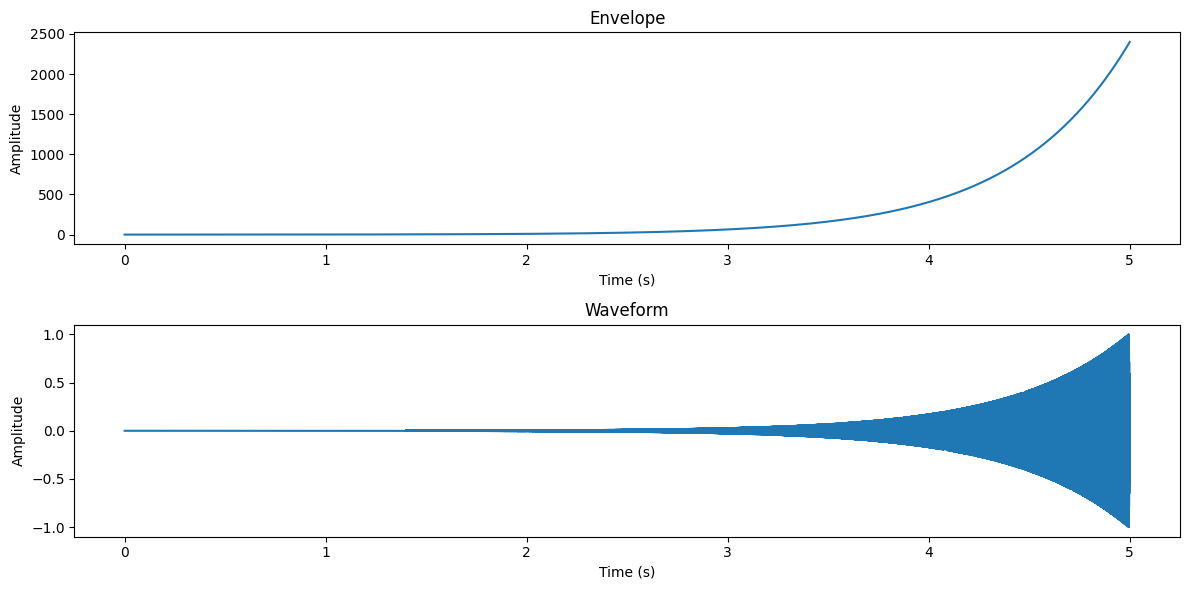

波形が生成され、output.wavに保存されました。


In [ ]:
import numpy as np
from scipy.signal import chirp
from scipy.io import wavfile
import matplotlib.pyplot as plt

# パラメータ設定
duration = 5.0  # サウンドの長さ（秒）
sample_rate = 48000  # サンプリングレート
frequency_start = 10  # 開始周波数（Hz）
frequency_end = 24000  # 終了周波数（Hz）

# 時間ベクトルを生成
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# エンベロープを計算
T = duration
envelope = (
    t * (frequency_end / frequency_start) ** (t / T) / T
)  # エンベロープ式

# 波形を生成
waveform = chirp(t, f0=frequency_start, f1=frequency_end, t1=duration, method="quadratic")
waveform *= envelope  # エンベロープを適用

# 波形を正規化
waveform /= np.max(np.abs(waveform))

# 波形を整数に変換
waveform_int = np.int16(waveform * 32767)

# 波形を.wavファイルに保存
output_file = "output.wav"
wavfile.write(output_file, sample_rate, waveform_int)

# グラフを描画
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, envelope)
plt.title("Envelope")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(t, waveform)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

print("波形が生成され、{}に保存されました。".format(output_file))


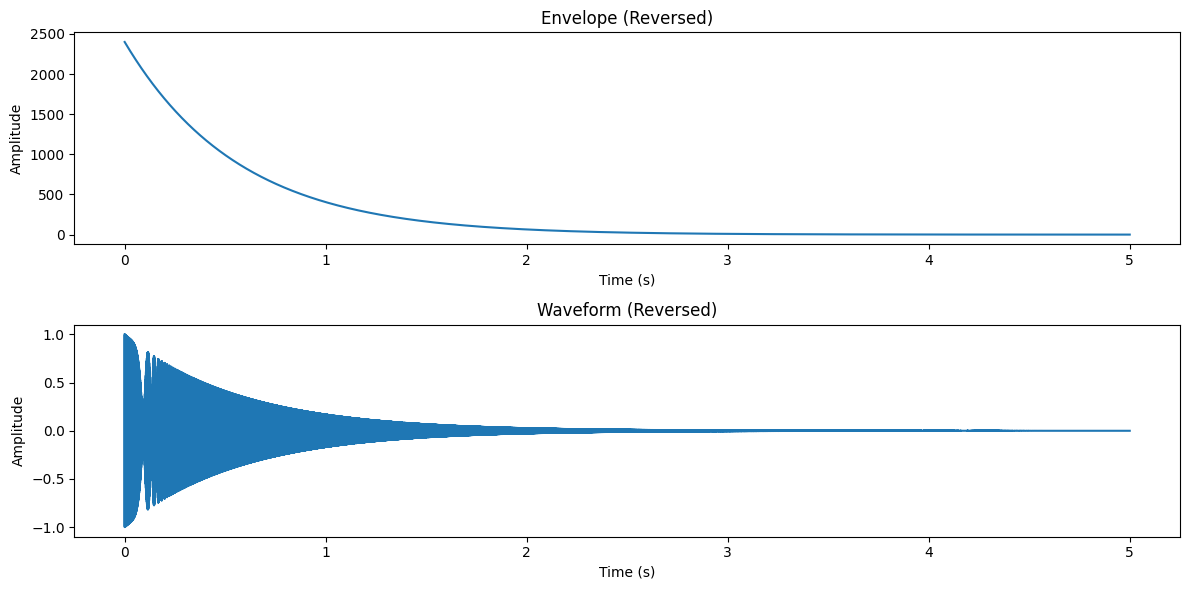

逆向きの波形が生成され、output_reversed.wavに保存されました。


In [ ]:
import numpy as np
from scipy.signal import chirp
from scipy.io import wavfile
import matplotlib.pyplot as plt

# パラメータ設定
duration = 5.0  # サウンドの長さ（秒）
sample_rate = 48000  # サンプリングレート
frequency_start = 10  # 開始周波数（Hz）
frequency_end = 24000  # 終了周波数（Hz）

# 時間ベクトルを生成
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# エンベロープを計算
T = duration
envelope = (
    (duration - t) * (frequency_end / frequency_start) ** ((duration - t) / T) / T
)  # 逆向きエンベロープ式

# 波形を生成
waveform = chirp(
    t, f0=frequency_end, f1=frequency_start, t1=duration, method="quadratic"
)
waveform *= envelope  # エンベロープを適用

# 波形を正規化
waveform /= np.max(np.abs(waveform))

# 波形を整数に変換
waveform_int = np.int16(waveform * 32767)

# 波形を.wavファイルに保存
output_file = "output_reversed.wav"
wavfile.write(output_file, sample_rate, waveform_int)

# グラフを描画
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, envelope)
plt.title("Envelope (Reversed)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(t, waveform)
plt.title("Waveform (Reversed)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

print("逆向きの波形が生成され、{}に保存されました。".format(output_file))


In [ ]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.io import wavfile

# Parameters
FS = 48000  # Sample rate
T = 5  # Signal length (seconds)
NumSamples = int(T * FS)
freqBegin = 20.0  # Measurement start frequency (Hz)
freqEnd = 24000.0  # Measurement end frequency (Hz)

# Initialize arrays
ESS = np.zeros(NumSamples, dtype=np.double)
inverseFilter = np.zeros(NumSamples, dtype=np.double)
ampEnv = np.zeros(NumSamples, dtype=np.double)

# Calculate alpha
alpha = (2.0 * np.pi * freqBegin * T) / np.log(freqEnd / freqBegin)

# Calculate amplitude envelope
for i in range(NumSamples):
    ampEnv[i] = pow(10, ((-6 * np.log2(freqEnd / freqBegin))
                         * (i / NumSamples)) * 0.05)

# Create ESS (Exponential Sine Sweep) signal
for i in range(NumSamples):
    t = i / FS
    ESS[i] = np.sin(
        alpha * (np.exp((t / T) * np.log(freqEnd / freqBegin)) - 1.0))

# Create inverse filter
for i in range(NumSamples):
    t = (NumSamples - (i + 1)) / FS
    inverseFilter[i] = np.sin(
        alpha * (np.exp((t / T) * np.log(freqEnd / freqBegin)) - 1.0)) * ampEnv[i]

# Calculate inverse filter frequency response
inverseFilter_fft = np.fft.fft(inverseFilter)

# Calculate inverse of inverse filter frequency response
inverseFilter_fft_inv = 1.0 / inverseFilter_fft

# Calculate inverse filter time domain signal
inverseFilter_time = ifft(inverseFilter_fft_inv)

# Write inverse filter to wav file
wavfile.write("inverse_filter.wav", FS, inverseFilter_time.astype(np.int16))


<ipython-input-6-f5dea76aaa09>:49: ComplexWarning: Casting complex values to real discards the imaginary part
  wavfile.write("inverse_filter.wav", FS, inverseFilter_time.astype(np.int16))


In [ ]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.io import wavfile

# Parameters
FS = 48000  # Sample rate
T = 5  # Signal length (seconds)
NumSamples = int(T * FS)
freqBegin = 20.0  # Measurement start frequency (Hz)
freqEnd = 24000.0  # Measurement end frequency (Hz)

# Initialize arrays
ESS = np.zeros(NumSamples, dtype=np.double)
inverseFilter = np.zeros(NumSamples, dtype=np.double)
ampEnv = np.zeros(NumSamples, dtype=np.double)

# Calculate alpha
alpha = (2.0 * np.pi * freqBegin * T) / np.log(freqEnd / freqBegin)

# Calculate amplitude envelope
for i in range(NumSamples):
    ampEnv[i] = pow(10, ((-6 * np.log2(freqEnd / freqBegin))
                         * (i / NumSamples)) * 0.05)

# Create ESS (Exponential Sine Sweep) signal
for i in range(NumSamples):
    t = i / FS
    ESS[i] = np.sin(
        alpha * (np.exp((t / T) * np.log(freqEnd / freqBegin)) - 1.0))

# Create inverse filter
for i in range(NumSamples):
    t = (NumSamples - (i + 1)) / FS
    inverseFilter[i] = np.sin(
        alpha * (np.exp((t / T) * np.log(freqEnd / freqBegin)) - 1.0)) * ampEnv[i]

# Calculate inverse filter frequency response
inverseFilter_fft = np.fft.fft(inverseFilter)

# Calculate inverse of inverse filter frequency response
inverseFilter_fft_inv = 1.0 / inverseFilter_fft

# Calculate inverse filter time domain signal
inverseFilter_time = np.fft.ifft(inverseFilter_fft_inv)

# Convert normInverseFilter to real
normInverseFilter = np.real(normInverseFilter)

# Write inverse filter to wav file
wavfile.write("inverse_filter.wav", FS, normInverseFilter.astype(np.int16))


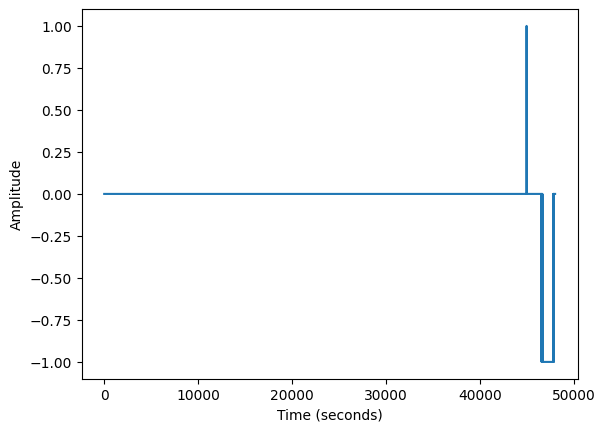

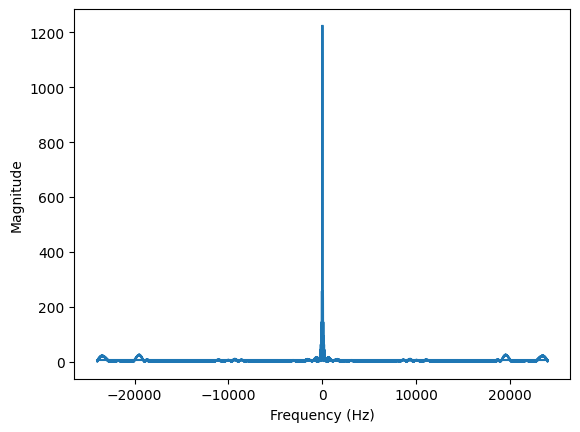

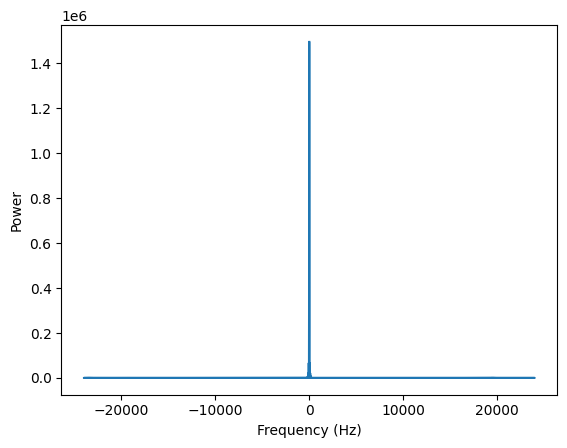

TypeError: ignored

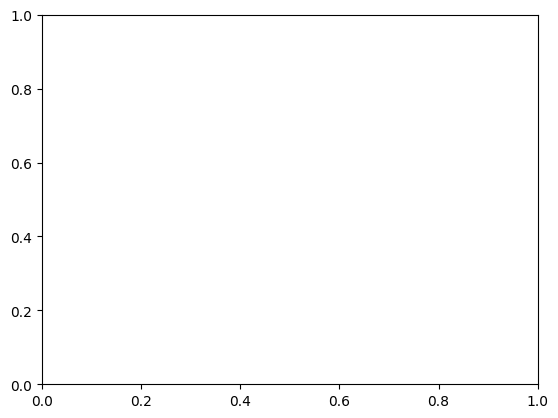

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load wav file
FS, data = wavfile.read("inverse_filter.wav")

# Plot time domain signal
plt.plot(data)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

# Plot frequency domain signal
fftData = np.fft.fft(data)
fftFreq = np.fft.fftfreq(data.size, 1.0 / FS)
plt.plot(fftFreq, np.abs(fftData))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

# Plot power spectrum
power = np.abs(fftData) ** 2
plt.plot(fftFreq, power)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.show()

# Plot spectrogram
spectrogram = np.abs(np.fft.fftshift(np.fft.fft(data, axis=0))) ** 2
plt.imshow(spectrogram, aspect="auto", origin="lower")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.show()


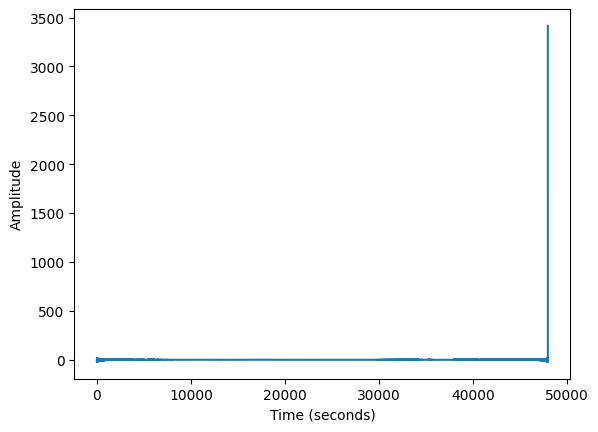

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.io import wavfile

# Parameters
FS = 48000  # Sample rate
T = 1  # Signal length (seconds)
NumSamples = int(T * FS)
freqBegin = 20.0  # Measurement start frequency (Hz)
freqEnd = 24000.0  # Measurement end frequency (Hz)

# Initialize arrays
ESS = np.zeros(NumSamples, dtype=np.double)
inverseFilter = np.zeros(NumSamples, dtype=np.double)
ampEnv = np.zeros(NumSamples, dtype=np.double)

# Calculate alpha
alpha = (2.0 * np.pi * freqBegin * T) / np.log(freqEnd / freqBegin)

# Calculate amplitude envelope
for i in range(NumSamples):
    ampEnv[i] = pow(10, ((-6 * np.log2(freqEnd / freqBegin))
                         * (i / NumSamples)) * 0.05)

# Create ESS (Exponential Sine Sweep) signal
for i in range(NumSamples):
    t = i / FS
    ESS[i] = np.sin(
        alpha * (np.exp((t / T) * np.log(freqEnd / freqBegin)) - 1.0))

# Create inverse filter
for i in range(NumSamples):
    t = (NumSamples - (i + 1)) / FS
    inverseFilter[i] = np.sin(
        alpha * (np.exp((t / T) * np.log(freqEnd / freqBegin)) - 1.0)) * ampEnv[i]

# Calculate inverse filter frequency response
inverseFilter_fft = np.fft.fft(inverseFilter)

# Calculate inverse of inverse filter frequency response
inverseFilter_fft_inv = 1.0 / inverseFilter_fft

# Calculate inverse filter time domain signal
inverseFilter_time = ifft(inverseFilter_fft_inv)

# Calculate ESS frequency response
ESS_fft = np.fft.fft(ESS)

# Calculate convolution of inverse ESS envelope and ESS
convolution = np.real(np.fft.ifft(np.fft.ifftshift(np.fft.ifftshift(
    np.multiply(inverseFilter_fft, ESS_fft)))))

# Plot convolution
plt.plot(convolution)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()
